In [ ]:
# getting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# taking two samples from ALL and HEM
sample_all = "/content/drive/MyDrive/Leukemia/train_set/ALL/UID_11_10_1_all.bmp"
sample_hem = "/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H10_100_1_hem.bmp"

In [ ]:
# source folders
all_src = "/content/drive/MyDrive/Leukemia/train_set/ALL/"
hem_src = "/content/drive/MyDrive/Leukemia/train_set/HEM/"

In [ ]:
# sample original image
sample_img = '/content/drive/MyDrive/Leukemia/original_demo.bmp'

In [ ]:
from skimage import io
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread(sample_img, 1)

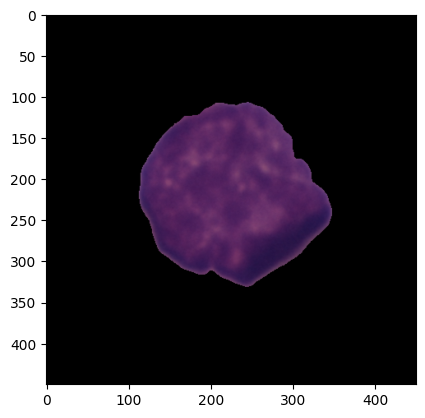

In [ ]:
org_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(org_img)
plt.show()

**Applying different Filters**

In [ ]:
cv2.__version__

'4.6.0'

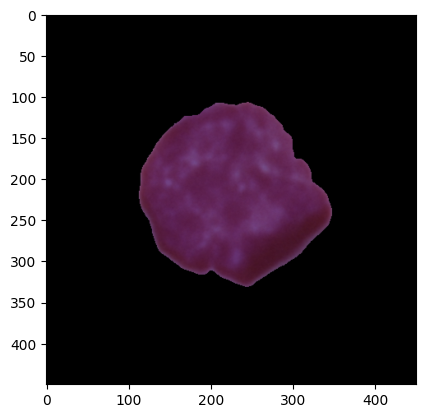

In [ ]:
# BGR image
bgr_img = img
plt.imshow(bgr_img)

Shape of B:  (450, 450)


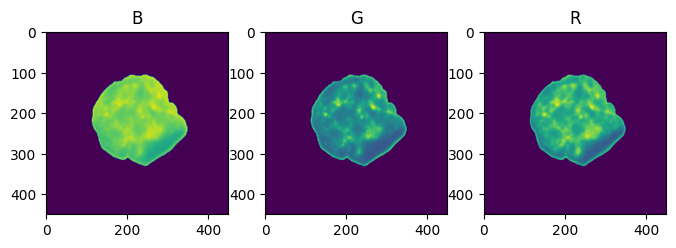

In [ ]:
# splitting LAB image into l,a, b channel
b,g,r = cv2.split(bgr_img) #

fig = plt.figure(figsize=(8,8))
print("Shape of B: ", b.shape)

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(b)
ax1.title.set_text("B")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(g)
ax2.title.set_text("G")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(r)
ax3.title.set_text("R")
plt.show()

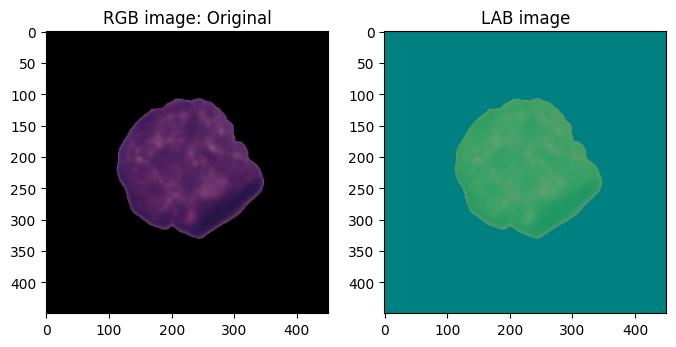

In [ ]:
# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(org_img, cv2.COLOR_RGB2LAB)  #

fig = plt.figure(figsize=(8,8))

ax2= fig.add_subplot(1,2,1)
ax2.imshow(org_img)
ax2.title.set_text("RGB image: Original")

ax3 = fig.add_subplot(1,2,2)
ax3.imshow(lab_img)
ax3.title.set_text("LAB image")
plt.show()

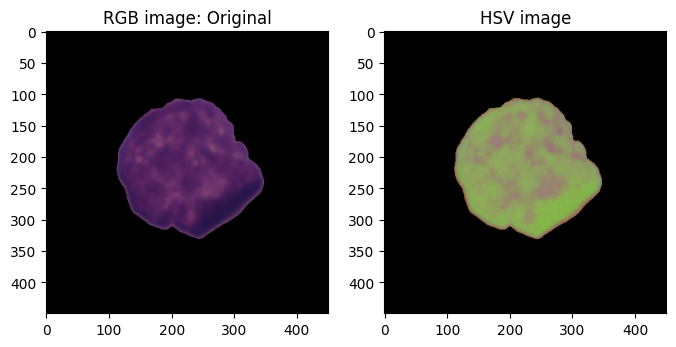

In [ ]:
## HSV
hsv_img = cv2.cvtColor(org_img, cv2.COLOR_RGB2HSV)  #

fig = plt.figure(figsize=(8,8))

ax2= fig.add_subplot(1,2,1)
ax2.imshow(org_img)
ax2.title.set_text("RGB image: Original")

ax3 = fig.add_subplot(1,2,2)
ax3.imshow(hsv_img)
ax3.title.set_text("HSV image")
plt.show()

<ipython-input-9-87c0045cf9d5>:6: RuntimeWarning: invalid value encountered in divide
  C = (1-img[...,2] - K)/(1-K)
<ipython-input-9-87c0045cf9d5>:7: RuntimeWarning: invalid value encountered in divide
  M = (1-img[...,1] - K)/(1-K)
<ipython-input-9-87c0045cf9d5>:8: RuntimeWarning: invalid value encountered in divide
  Y = (1-img[...,0] - K)/(1-K)


shape of cmyk image:  (450, 450, 3)


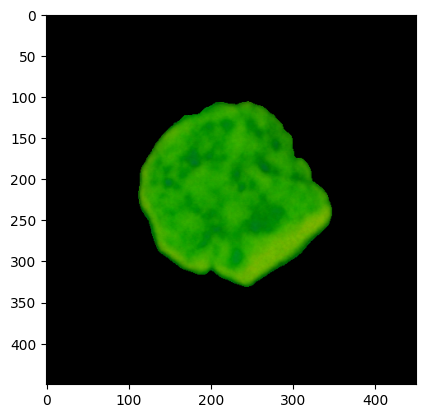

In [ ]:
# CMY
import numpy as np

d_img = org_img.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

cmy_image= (np.dstack((C,M,Y)) * 255).astype(np.uint8)
print("shape of cmyk image: ", cmy_image.shape)
plt.imshow(cmy_image)
plt.show()

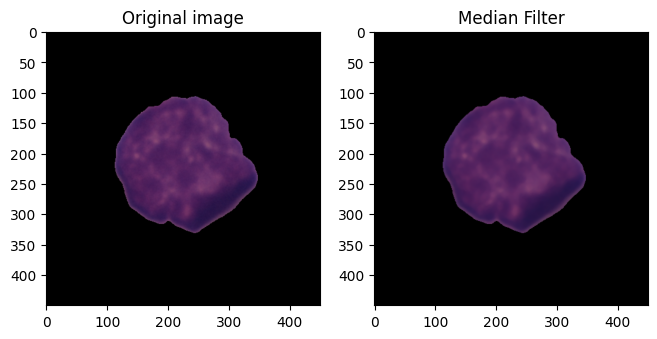

In [ ]:
### MEDIAN filter
# median using cv2
median_img = cv2.medianBlur(org_img, 5)  # 5 is the kernel size

fig = plt.figure(figsize=(12,12))

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(org_img, cmap= 'gray')
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(median_img,cmap= 'gray')
ax2.title.set_text("Median Filter")

plt.show()

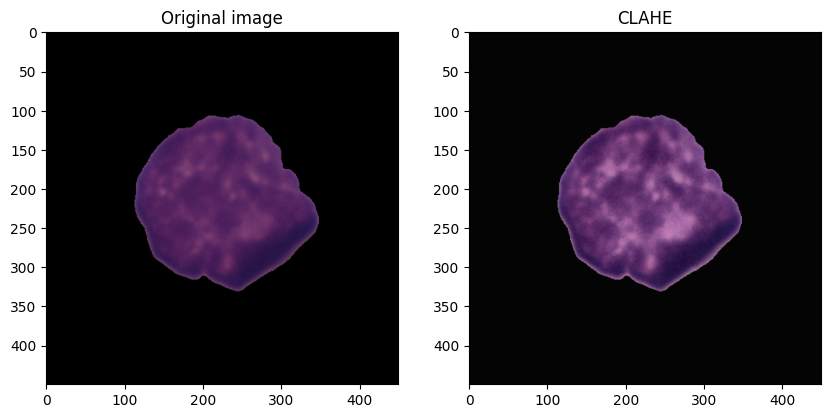

In [ ]:
# Applying CLAHE

# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(org_img, cv2.COLOR_RGB2LAB)

# splitting LAB image into l,a, b channel
l,a,b = cv2.split(lab_img)

# applying clahe to L channel
clahe = cv2.createCLAHE(clipLimit= 2.0, tileGridSize=(4,4))
clahe_img = clahe.apply(l)

# now combining clahe L, A and B
f_clahe_img = cv2.merge((clahe_img, a, b))
clahe_col = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

# Now we will plot original image, histogram equalized image and CLAHE image
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(org_img)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(clahe_col)
ax2.title.set_text("CLAHE")

plt.show()

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


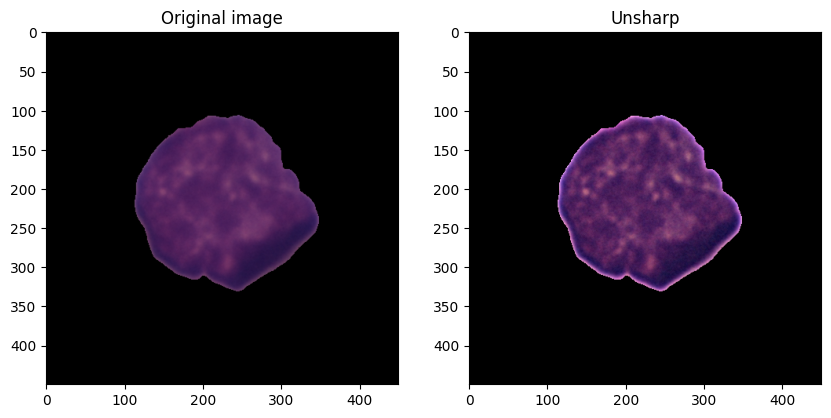

In [ ]:
### UNSHARP
from skimage.filters import unsharp_mask
from skimage import img_as_ubyte

# Applying unsharp mask
unsharp_img = unsharp_mask(org_img, radius= 5, amount= 2)

# convert to 8 bit int, as unsharp converted as img as float
f_img = img_as_ubyte(unsharp_img)

# Now we will plot original image, histogram equalized image and Unsharp image
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(org_img)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(f_img)
ax2.title.set_text("Unsharp")

plt.show()

Type of image:  <class 'numpy.ndarray'>


<ipython-input-13-049810af3e36>:11: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)
<ipython-input-13-049810af3e36>:13: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=15,


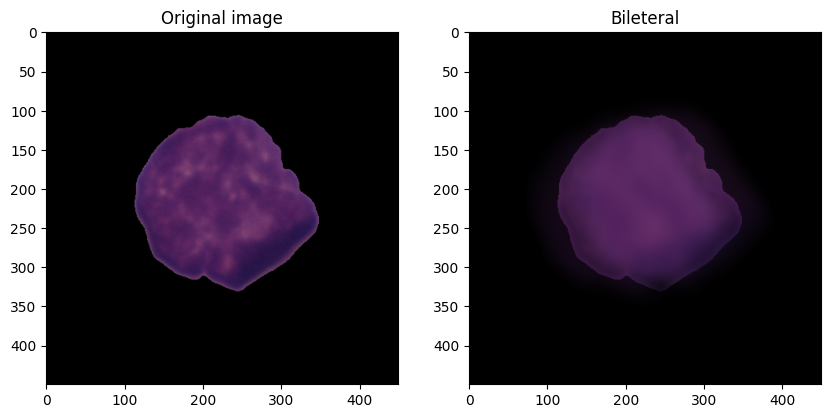

In [ ]:
### BILATERAL

from skimage.metrics import peak_signal_noise_ratio

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import img_as_float

noisy_img = img_as_float(io.imread(sample_img))
print("Type of image: ", type(noisy_img))
sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=15,
                multichannel=True)


# Now we will plot original image, histogram equalized image and Biliteral image
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(org_img)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(denoise_bilateral)
ax2.title.set_text("Bileteral")

plt.show()

<ipython-input-14-c4c35a7c6fbc>:7: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(img, multichannel=True))
<ipython-input-14-c4c35a7c6fbc>:13: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,


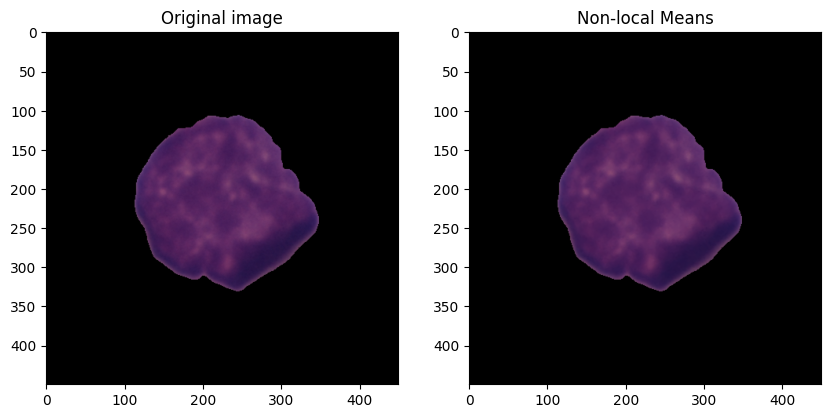

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
import numpy as np

img = img_as_float(io.imread(sample_img))

sigma_est = np.mean(estimate_sigma(img, multichannel=True))

patch_kw = dict(patch_size=5,
                patch_distance=3,
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(org_img)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
# ax2.imshow(denoise_img_as_8byte)
ax2.imshow(denoise_img)
ax2.title.set_text("Non-local Means")

plt.show()

Original image shape: (450, 450, 3)
Cropped image shape: (310, 310, 3)


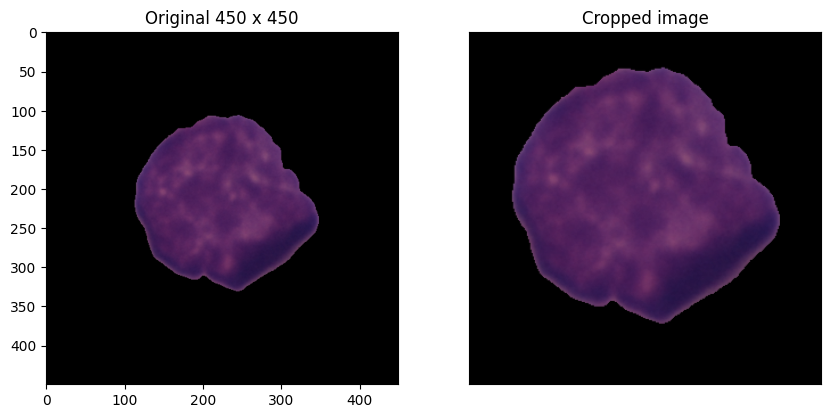

In [ ]:
### Cropping
# Importing Image class from PIL module
from PIL import Image
from matplotlib import cm

width, height = img.shape[0], img.shape[1]

# cropped_image = clahe_m[100:375, 100:375]
print(f"Original image shape: {org_img.shape}")
cropped_img = org_img[75:385, 75:385]
print(f"Cropped image shape: {cropped_img.shape}")

fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(org_img)
ax1.title.set_text("Original 450 x 450")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(cropped_img)
ax2.title.set_text("Cropped image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()


In [ ]:
## apending all images into a list
img_list = []
img_list.append(org_img)
img_list.append(bgr_img)
img_list.append(lab_img)
img_list.append(hsv_img)
img_list.append(cmy_image)
img_list.append(median_img)
img_list.append(clahe_col)
img_list.append(f_img) # unsharp
img_list.append(denoise_bilateral)
img_list.append(denoise_img) #NLM
img_list.append(cropped_img)

filter_name = []
filter_name.append('Original')
filter_name.append('BGR')
filter_name.append('LAB')
filter_name.append('HSV')
filter_name.append('CMY')
filter_name.append('Median')
filter_name.append('CLAHE')
filter_name.append('Unsharp')
filter_name.append('Bilateral')
filter_name.append('NLM')
filter_name.append('Cropped')

In [ ]:
# plt.imshow(img_list[10])
filter_name[9]

'NLM'

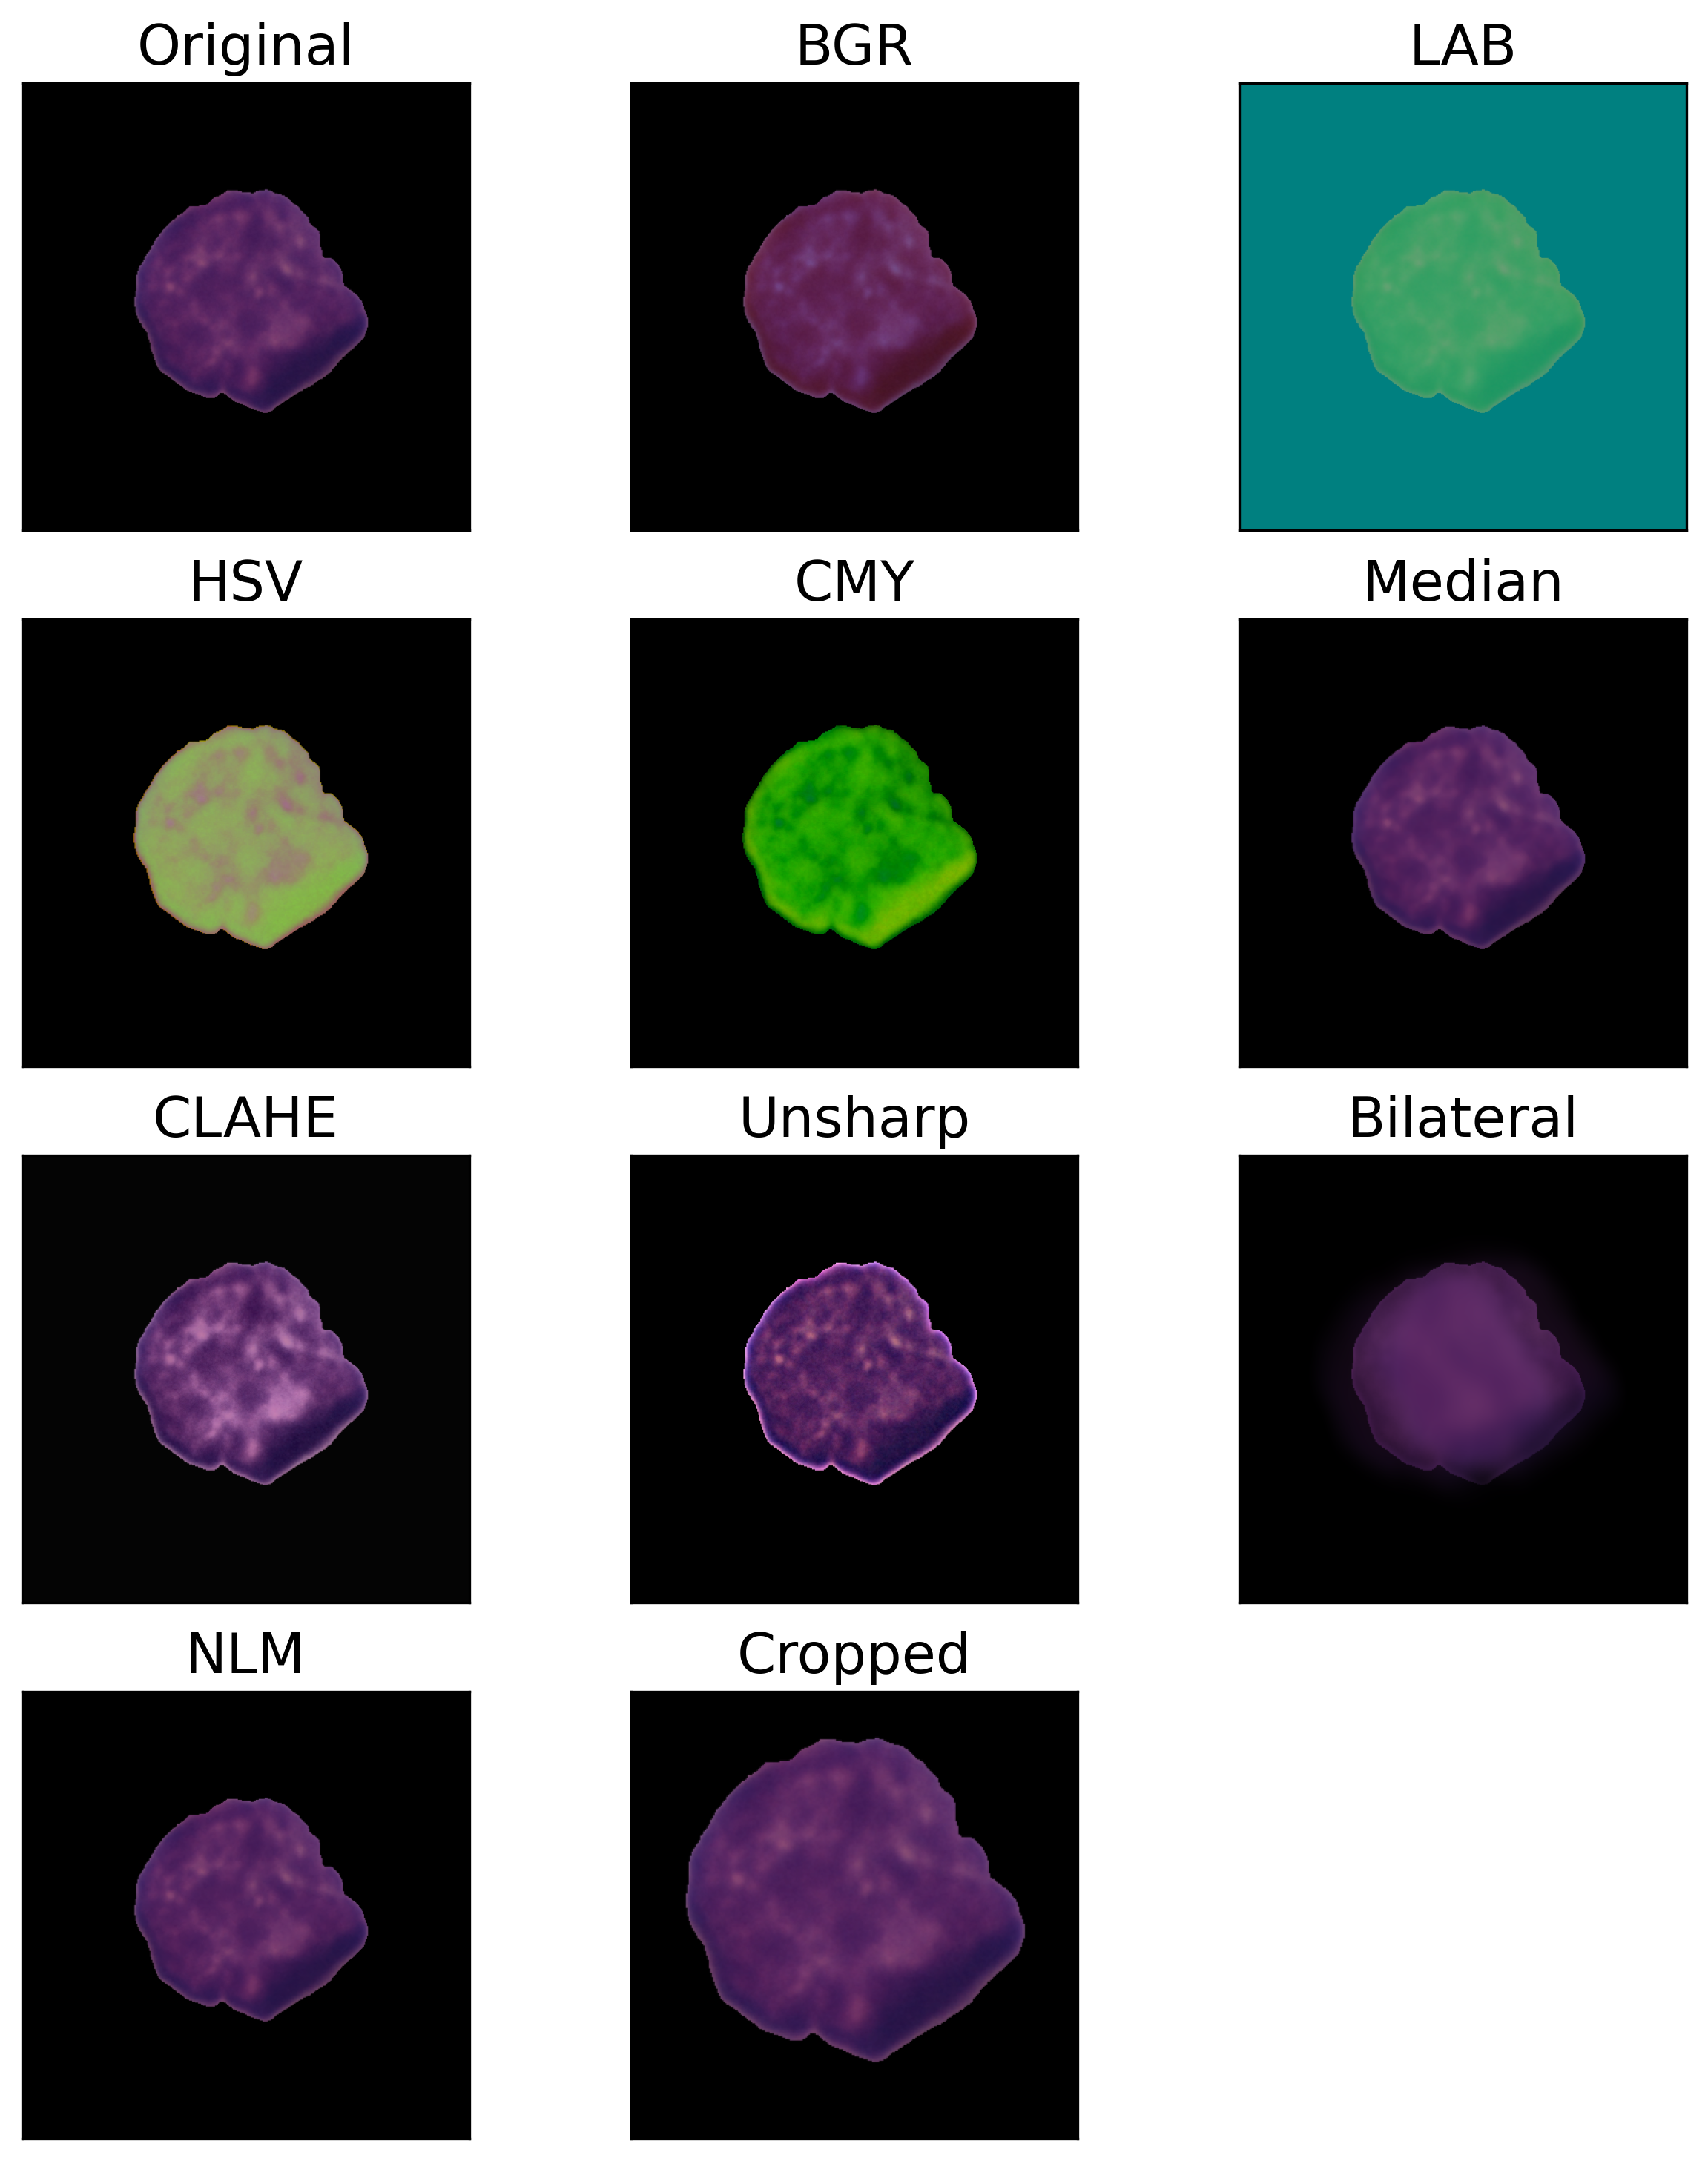

In [ ]:
# plotting images
# showing rgb image alongwith its colorspace converted images
fig = plt.figure(figsize=(10,12))
# change resolution
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400



ax= fig.add_subplot(4, 3, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[0])
ax.set_title(filter_name[0], fontsize=18)

ax= fig.add_subplot(4,3,2)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[1])
ax.set_title(filter_name[1], fontsize=18)

ax = fig.add_subplot(4,3,3)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[2])
ax.set_title(filter_name[2], fontsize=18)

ax = fig.add_subplot(4,3,4)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[3])
ax.set_title(filter_name[3], fontsize=18)

ax = fig.add_subplot(4,3,5)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[4])
ax.set_title(filter_name[4], fontsize=18)

ax= fig.add_subplot(4, 3, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[5])
ax.set_title(filter_name[5], fontsize=18)

ax= fig.add_subplot(4,3,7)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[6])
ax.set_title(filter_name[6], fontsize=18)

ax = fig.add_subplot(4,3,8)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[7])
ax.set_title(filter_name[7], fontsize=18)

ax = fig.add_subplot(4,3,9)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[8])
ax.set_title(filter_name[8], fontsize=18)

ax = fig.add_subplot(4,3,10)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[9])
ax.set_title(filter_name[9], fontsize=18)

ax = fig.add_subplot(4,3,11)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(img_list[10])
ax.set_title(filter_name[10], fontsize=18)

plt.savefig('/content/drive/MyDrive/Leukemia/results/image_filters_2.png', transparent=True)
plt.show()
# plt.show()

## ColorSpace

Shape of image:  (450, 450, 3)


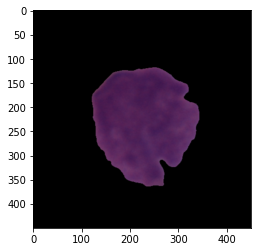

In [ ]:
# converting BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #
print("Shape of image: ", img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# saving a sample rgb iamge into directory
# saving image to destination folder
dest_demo = "/content/drive/MyDrive/Leukemia/"
io.imsave(dest_demo + 'demo_save'+ str(1)+'.jpg', img_rgb)
print("Image saved !")

In [ ]:
# demo save BGR
dest_demo = "/content/drive/MyDrive/Leukemia/"
io.imsave(dest_demo + 'demo_save_bgr_'+ str(1)+'.jpg', img)
print("Image saved !")

Image saved !


In [ ]:
# Saving All BGR images into directory
dest_bgr_all = "/content/drive/MyDrive/Leukemia/bgr_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)

    # saving BGR image
    io.imsave(dest_bgr_all + 'all_bgr_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into BGR and saved..!")

Total 2500 ALL images converted into BGR and saved..!


In [ ]:
# defining hem_bgr directory
dest_bgr_hem = "/content/drive/MyDrive/Leukemia/bgr_train/HEM/"

# keep track
k = 0
# gg = cv2.imread("/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_7_hem.bmp", 1)
# print(gg.shape)

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)  # src_fold + image_name
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    print(img_file)
    img = cv2.imread(img_file, 1)

    # saving BGR image
    io.imsave(dest_bgr_hem + 'hem_bgr_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into BGR and saved..!")

/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_7_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_8_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_5_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_27_9_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_10_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_13_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_2_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_3_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_27_8_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_1_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_6_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_4_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_12_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_27_7_hem.bmp
/content/drive/MyDrive/Leukemia/train_set/HEM/UID_H14_28_11

Shape of R:  (450, 450)


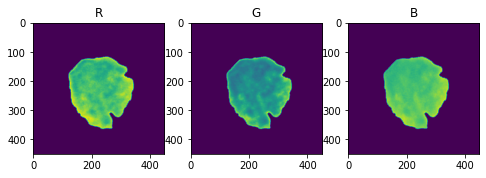

In [ ]:
# splitting LAB image into l,a, b channel
r,g,b = cv2.split(img_rgb) #

fig = plt.figure(figsize=(8,8))
print("Shape of R: ", r.shape)

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(r)
ax1.title.set_text("R")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(g)
ax2.title.set_text("G")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(b)
ax3.title.set_text("B")
plt.show()

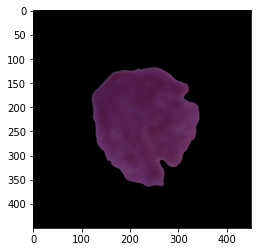

In [ ]:
# plotting BGR format
plt.imshow(img)
plt.show()

Shape of B:  (450, 450)


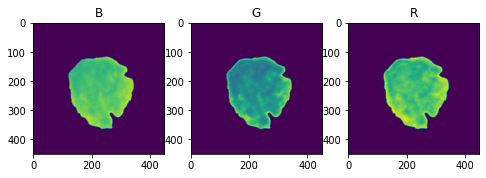

In [ ]:
# splitting LAB image into l,a, b channel
b,g,r = cv2.split(img) #

fig = plt.figure(figsize=(8,8))
print("Shape of B: ", b.shape)

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(b)
ax1.title.set_text("B")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(g)
ax2.title.set_text("G")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(r)
ax3.title.set_text("R")
plt.show()

**Converting to LAB colorsapace**

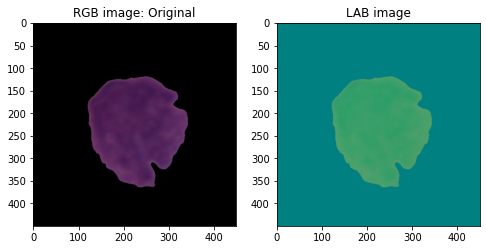

In [ ]:
# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)  #

fig = plt.figure(figsize=(8,8))

ax2= fig.add_subplot(1,2,1)
ax2.imshow(img_rgb)
ax2.title.set_text("RGB image: Original")

ax3 = fig.add_subplot(1,2,2)
ax3.imshow(lab_img)
ax3.title.set_text("LAB image")
plt.show()

In [ ]:
# sample LAB image save
dest_lab_all = "/content/drive/MyDrive/Leukemia/lab_train/ALL/"
dest_lab_hem = "/content/drive/MyDrive/Leukemia/lab_train/HEM/"

lab_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
io.imsave(dest_demo+"lab_version.png", lab_img)

In [ ]:
# Saving All BGR images into directory
dest_lab_all = "/content/drive/MyDrive/Leukemia/lab_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to LAB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # saving LAB image
    io.imsave(dest_lab_all + 'all_lab_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into LAB and saved..!")

Total 2500 ALL images converted into BGR and saved..!


In [ ]:
# Saving All BGR images into directory
dest_lab_hem = "/content/drive/MyDrive/Leukemia/lab_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to LAB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # saving LAB image
    io.imsave(dest_lab_hem + 'hem_lab_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into LAB and saved..!")

<ipython-input-28-8596a1c9f5d1>:18: UserWarning: /content/drive/MyDrive/Leukemia/lab_train/HEM/hem_lab_124.png is a low contrast image
  io.imsave(dest_lab_hem + 'hem_lab_'+ str(k)+ '.png', img)
<ipython-input-28-8596a1c9f5d1>:18: UserWarning: /content/drive/MyDrive/Leukemia/lab_train/HEM/hem_lab_791.png is a low contrast image
  io.imsave(dest_lab_hem + 'hem_lab_'+ str(k)+ '.png', img)
<ipython-input-28-8596a1c9f5d1>:18: UserWarning: /content/drive/MyDrive/Leukemia/lab_train/HEM/hem_lab_1073.png is a low contrast image
  io.imsave(dest_lab_hem + 'hem_lab_'+ str(k)+ '.png', img)
<ipython-input-28-8596a1c9f5d1>:18: UserWarning: /content/drive/MyDrive/Leukemia/lab_train/HEM/hem_lab_1909.png is a low contrast image
  io.imsave(dest_lab_hem + 'hem_lab_'+ str(k)+ '.png', img)
<ipython-input-28-8596a1c9f5d1>:18: UserWarning: /content/drive/MyDrive/Leukemia/lab_train/HEM/hem_lab_2181.png is a low contrast image
  io.imsave(dest_lab_hem + 'hem_lab_'+ str(k)+ '.png', img)
<ipython-input-28-8596

Total 2500 HEM images converted into LAB and saved..!


Shape of L:  (450, 450)


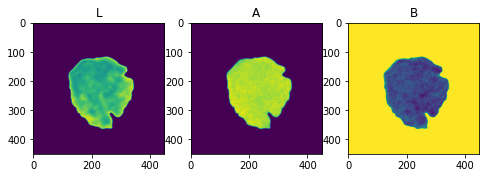

In [ ]:
# splitting LAB image into l,a, b channel
l,a,b = cv2.split(lab_img) #

fig = plt.figure(figsize=(8,8))
print("Shape of L: ", l.shape)

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(l)
ax1.title.set_text("L")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(a)
ax2.title.set_text("A")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(b)
ax3.title.set_text("B")
plt.show()

**COnverting to HSV colorspace**

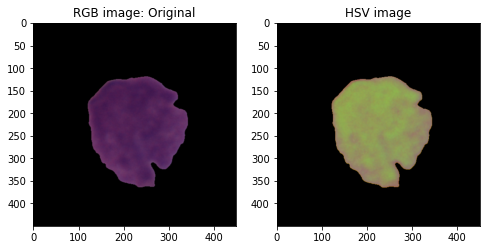

In [ ]:
# converting to image to LAB color space so CLAHE can be applied to luminance
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)  #

fig = plt.figure(figsize=(8,8))

ax2= fig.add_subplot(1,2,1)
ax2.imshow(img_rgb)
ax2.title.set_text("RGB image: Original")

ax3 = fig.add_subplot(1,2,2)
ax3.imshow(hsv_img)
ax3.title.set_text("HSV image")
plt.show()

In [ ]:
# sample save image
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
io.imsave(dest_demo+"hsv_version.png", hsv_img)

In [ ]:
# Saving All HSV images into directory
dest_hsv_all = "/content/drive/MyDrive/Leukemia/hsv_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # converting RGB to HSV
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # plt.imshow(img)
    # plt.show()

    # saving HSV image
    io.imsave(dest_hsv_all + 'all_hsv_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into HSV and saved..!")

Total 2500 ALL images converted into HSV and saved..!


In [ ]:
# Saving HEM HSV images into directory
dest_hsv_hem = "/content/drive/MyDrive/Leukemia/hsv_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # converting RGB to HSV
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # plt.imshow(img)
    # plt.show()

    # saving HSV image
    io.imsave(dest_hsv_hem + 'hem_hsv_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into HSV and saved..!")

Total 2500 HEM images converted into HSV and saved..!


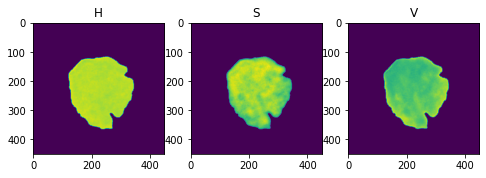

In [ ]:
# splitting LAB image into l,a, b channel
h,s,v = cv2.split(hsv_img) #

fig = plt.figure(figsize=(8,8))

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(h)
ax1.title.set_text("H")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(s)
ax2.title.set_text("S")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(v)
ax3.title.set_text("V")
plt.show()

**RGB to CMYK**

shape of cmyk image:  (450, 450, 3)


<ipython-input-38-9a226bb06682>:5: RuntimeWarning: invalid value encountered in true_divide
  C = (1-img[...,2] - K)/(1-K)
<ipython-input-38-9a226bb06682>:6: RuntimeWarning: invalid value encountered in true_divide
  M = (1-img[...,1] - K)/(1-K)
<ipython-input-38-9a226bb06682>:7: RuntimeWarning: invalid value encountered in true_divide
  Y = (1-img[...,0] - K)/(1-K)


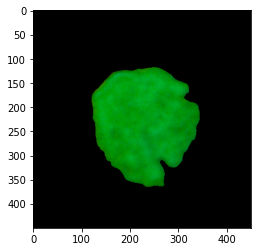

In [ ]:
import numpy as np

img = img_rgb.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

cmy_image= (np.dstack((C,M,Y)) * 255).astype(np.uint8)
print("shape of cmyk image: ", cmy_image.shape)
plt.imshow(cmy_image)
plt.show()

In [ ]:
# sample CMY image saving
img = img_rgb.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K)
M = (1-img[...,1] - K)/(1-K)
Y = (1-img[...,0] - K)/(1-K)

cmy_image= (np.dstack((C,M,Y)) * 255).astype(np.uint8)

io.imsave(dest_demo+"cmy_version.png", cmy_image)

<ipython-input-39-9518542bd2ec>:4: RuntimeWarning: invalid value encountered in true_divide
  C = (1-img[...,2] - K)/(1-K)
<ipython-input-39-9518542bd2ec>:5: RuntimeWarning: invalid value encountered in true_divide
  M = (1-img[...,1] - K)/(1-K)
<ipython-input-39-9518542bd2ec>:6: RuntimeWarning: invalid value encountered in true_divide
  Y = (1-img[...,0] - K)/(1-K)


In [ ]:
# Saving All HSV images into directory
dest_cmy_all = "/content/drive/MyDrive/Leukemia/cmy_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # converting RGB to CMY
    img = img.astype(np.float64)/255.
    K = 1 - np.max(img, axis=2)
    C = (1-img[...,2] - K)/(1-K)
    M = (1-img[...,1] - K)/(1-K)
    Y = (1-img[...,0] - K)/(1-K)

    cmy_image= (np.dstack((C,M,Y)) * 255).astype(np.uint8)
    # plt.imshow(cmy_image)
    # plt.show()

    # saving CMY image
    io.imsave(dest_cmy_all + 'all_cmy_'+ str(k)+ '.png', cmy_image)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into CMY and saved..!")

<ipython-input-42-2f54c40270e0>:19: RuntimeWarning: invalid value encountered in true_divide
  C = (1-img[...,2] - K)/(1-K)
<ipython-input-42-2f54c40270e0>:20: RuntimeWarning: invalid value encountered in true_divide
  M = (1-img[...,1] - K)/(1-K)
<ipython-input-42-2f54c40270e0>:21: RuntimeWarning: invalid value encountered in true_divide
  Y = (1-img[...,0] - K)/(1-K)


Total 2500 ALL images converted into CMY and saved..!


In [ ]:
# Saving All HSV images into directory
dest_cmy_hem = "/content/drive/MyDrive/Leukemia/cmy_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # converting RGB to CMY
    img = img.astype(np.float64)/255.
    K = 1 - np.max(img, axis=2)
    C = (1-img[...,2] - K)/(1-K)
    M = (1-img[...,1] - K)/(1-K)
    Y = (1-img[...,0] - K)/(1-K)

    cmy_image= (np.dstack((C,M,Y)) * 255).astype(np.uint8)
    # plt.imshow(cmy_image)
    # plt.show()

    # saving CMY image
    io.imsave(dest_cmy_hem + 'hem_cmy_'+ str(k)+ '.png', cmy_image)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into CMY and saved..!")

<ipython-input-43-5f3b95108dd9>:19: RuntimeWarning: invalid value encountered in true_divide
  C = (1-img[...,2] - K)/(1-K)
<ipython-input-43-5f3b95108dd9>:20: RuntimeWarning: invalid value encountered in true_divide
  M = (1-img[...,1] - K)/(1-K)
<ipython-input-43-5f3b95108dd9>:21: RuntimeWarning: invalid value encountered in true_divide
  Y = (1-img[...,0] - K)/(1-K)


Total 2500 HEM images converted into CMY and saved..!


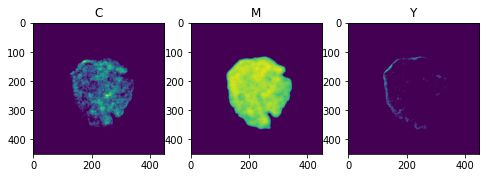

In [ ]:
 # splitting CMY image into c, m, y channel
c,m,y = cv2.split(cmy_image) #

fig = plt.figure(figsize=(8,8))

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(c)
ax1.title.set_text("C")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(m)
ax2.title.set_text("M")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(y)
ax3.title.set_text("Y")

plt.show()

Plotting Y: 


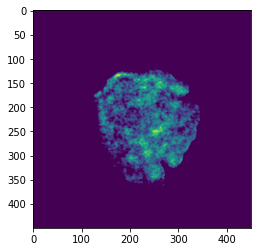

Plotting M: 


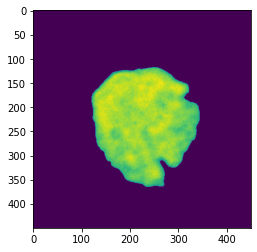

Plotting C: 


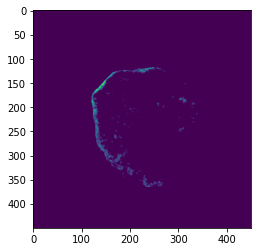

Plotting K: 


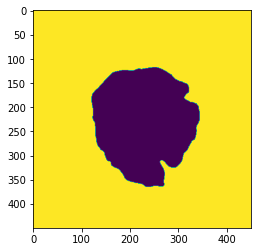

In [ ]:
# Create float
bgr = img.astype(float)/255.

# Extract channels
with np.errstate(invalid='ignore', divide='ignore'):
	K = 1 - np.max(bgr, axis=2)
	C = (1-bgr[...,2] - K)/(1-K)
	M = (1-bgr[...,1] - K)/(1-K)
	Y = (1-bgr[...,0] - K)/(1-K)

# Convert the input BGR image to CMYK colorspace
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

# Split CMYK channels
Y, M, C, K = cv2.split(CMYK)

np.isfinite(C).all()
np.isfinite(M).all()
np.isfinite(K).all()
np.isfinite(Y).all()
print("Plotting Y: ")
plt.imshow(Y)
plt.show()

print("Plotting M: ")
plt.imshow(M)
plt.show()

print("Plotting C: ")
plt.imshow(C)
plt.show()

print("Plotting K: ")
plt.imshow(K)
plt.show()

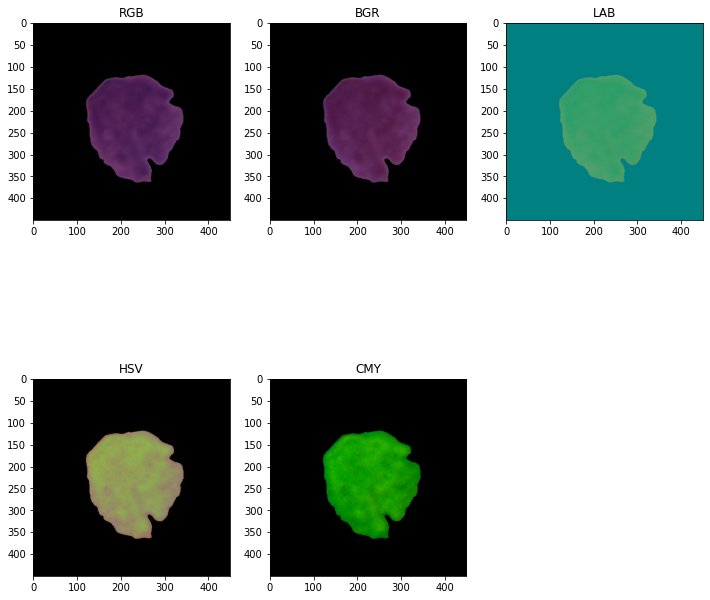

In [ ]:
# showing rgb image alongwith its colorspace converted images
fig = plt.figure(figsize=(12,12))

ax1= fig.add_subplot(2, 3, 1)
ax1.imshow(img_rgb)
ax1.title.set_text("RGB")

ax2= fig.add_subplot(2,3,2)
ax2.imshow(img)
ax2.title.set_text("BGR")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(lab_img)
ax3.title.set_text("LAB")

ax3 = fig.add_subplot(2,3,4)
ax3.imshow(hsv_img)
ax3.title.set_text("HSV")

ax3 = fig.add_subplot(2,3,5)
ax3.imshow(cmy_image)
ax3.title.set_text("CMY")

plt.show()

# FIlters

**MEDIAN Filter**

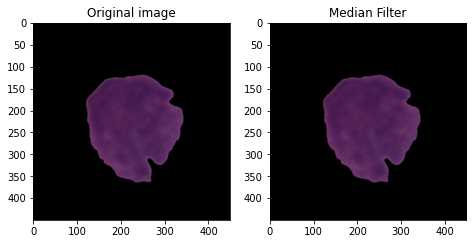

In [ ]:
# median using cv2
median_img = cv2.medianBlur(img_rgb, 3)  # 5 is the kernel size

fig = plt.figure(figsize=(12,12))

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(img_rgb, cmap= 'gray')
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(median_img,cmap= 'gray')
ax2.title.set_text("Median Filter")

plt.show()

In [ ]:
# demo saved for median filter
median_img = cv2.medianBlur(img_rgb, 3)
io.imsave(dest_demo+"median_version.png", median_img)

In [ ]:
# Saving All HSV images into directory
dest_med_all = "/content/drive/MyDrive/Leukemia/median_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # applying median blur
    img = cv2.medianBlur(img, 3)
    # plt.imshow(img)
    # plt.show()

    # saving median blurred image
    io.imsave(dest_med_all + 'all_median_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into Median filtered and saved..!")

Total 2500 ALL images converted into Median filtered and saved..!


In [ ]:
# Saving All HSV images into directory
dest_med_hem = "/content/drive/MyDrive/Leukemia/median_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # applying median blur
    img = cv2.medianBlur(img, 3)
    # plt.imshow(img)
    # plt.show()

    # saving HSV image
    io.imsave(dest_med_hem + 'hem_median_'+ str(k)+ '.png', img)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into Median filtered and saved..!")

Total 2500 HEM images converted into Median filtered and saved..!


**CLAHE Filter**

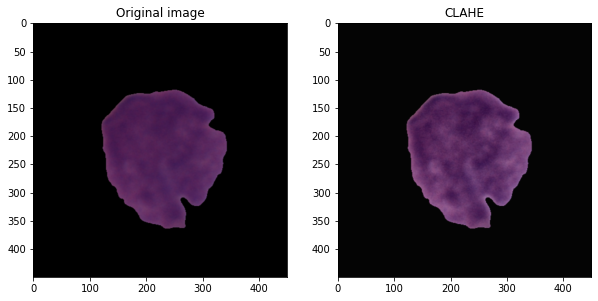

In [ ]:
# Applying CLAHE

# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

# splitting LAB image into l,a, b channel
l,a,b = cv2.split(lab_img)

# applying clahe to L channel
clahe = cv2.createCLAHE(clipLimit= 2.0, tileGridSize=(4,4))
clahe_img = clahe.apply(l)

# now combining clahe L, A and B
f_clahe_img = cv2.merge((clahe_img, a, b))
clahe_col = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

# Now we will plot original image, histogram equalized image and CLAHE image
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img_rgb)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(clahe_col)
ax2.title.set_text("CLAHE")

plt.show()

In [ ]:
# sample clahe image save
# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

# splitting LAB image into l,a, b channel
l,a,b = cv2.split(lab_img)

# applying clahe to L channel
clahe = cv2.createCLAHE(clipLimit= 2.0, tileGridSize=(4,4))
clahe_img = clahe.apply(l)

# now combining clahe L, A and B
f_clahe_img = cv2.merge((clahe_img, a, b))
clahe_col = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

io.imsave(dest_demo+ "clahe_version.png", clahe_col)

In [ ]:
# Saving All CLAHE images into directory
dest_clahe_all = "/content/drive/MyDrive/Leukemia/clahe_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # converting to image to LAB color space so CLAHE can be applied to luminance
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    # splitting LAB image into l,a, b channel
    l,a,b = cv2.split(lab_img)
    # applying clahe to L channel
    clahe = cv2.createCLAHE(clipLimit= 2.0, tileGridSize=(4,4))
    clahe_img = clahe.apply(l)
    # now combining clahe L, A and B
    f_clahe_img = cv2.merge((clahe_img, a, b))
    clahe_f = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

    # saving median blurred image
    io.imsave(dest_clahe_all + 'all_clahe_'+ str(k)+ '.png', clahe_f)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into CLAHE filtered and saved..!")

Total 2500 ALL images converted into CLAHE filtered and saved..!


In [ ]:
# Saving HEM CLAHE images into directory
dest_clahe_hem = "/content/drive/MyDrive/Leukemia/clahe_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # converting to image to LAB color space so CLAHE can be applied to luminance
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    # splitting LAB image into l,a, b channel
    l,a,b = cv2.split(lab_img)
    # applying clahe to L channel
    clahe = cv2.createCLAHE(clipLimit= 2.0, tileGridSize=(4,4))
    clahe_img = clahe.apply(l)
    # now combining clahe L, A and B
    f_clahe_img = cv2.merge((clahe_img, a, b))
    clahe_f = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

    # saving median blurred image
    io.imsave(dest_clahe_hem + 'hem_clahe_'+ str(k)+ '.png', clahe_f)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into CLAHE filtered and saved..!")

Total 2500 HEM images converted into CLAHE filtered and saved..!


**Unsharp Mask**

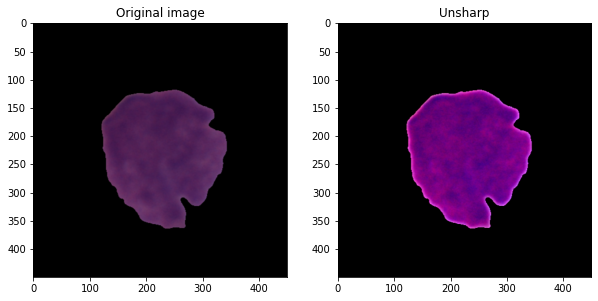

In [ ]:
from skimage.filters import unsharp_mask
from skimage import img_as_ubyte

# Applying unsharp mask
unsharp_img = unsharp_mask(img_rgb, radius= 5, amount= 2)

# convert to 8 bit int, as unsharp converted as img as float
f_img = img_as_ubyte(unsharp_img)

# Now we will plot original image, histogram equalized image and Unsharp image
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img_rgb)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(f_img)
ax2.title.set_text("Unsharp")

plt.show()

# saving image to destination folder
# io.imsave(dest_non_tumor + 'non_tumor_'+ str(i)+'.jpg', f_img)
# print(str(i)+ " image done.")

In [ ]:
# sample unsharp saved image
dest_demo = "/content/drive/MyDrive/Leukemia/"
io.imsave(dest_demo+"unsharp_mask.png", f_img)

In [ ]:
# Saving All unsharp images into directory
dest_unsharp_all = "/content/drive/MyDrive/Leukemia/unsharp_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Applying unsharp mask
    unsharp_img = unsharp_mask(img, radius= 5, amount= 2)

    # convert to 8 bit int, as unsharp converted as img as float
    f_img = img_as_ubyte(unsharp_img)

    # saving unsharp image
    io.imsave(dest_unsharp_all + 'all_unsharp_'+ str(k)+ '.png', f_img)
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into unsharp filtered and saved..!")

Total 2500 ALL images converted into unsharp filtered and saved..!


In [ ]:
# Saving All unsharp images into directory
dest_unsharp_hem = "/content/drive/MyDrive/Leukemia/unsharp_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # print(img_file)
    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Applying unsharp mask
    unsharp_img = unsharp_mask(img, radius= 5, amount= 2)

    # convert to 8 bit int, as unsharp converted as img as float
    f_img = img_as_ubyte(unsharp_img)

    # saving unsharp image
    io.imsave(dest_unsharp_hem + 'hem_unsharp_'+ str(k)+ '.png', f_img)
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into unsharp filtered and saved..!")

<ipython-input-22-709e92bcd370>:24: UserWarning: /content/drive/MyDrive/Leukemia/unsharp_train/HEM/hem_unsharp_2181.png is a low contrast image
  io.imsave(dest_unsharp_hem + 'hem_unsharp_'+ str(k)+ '.png', f_img)


Total 2500 HEM images converted into unsharp filtered and saved..!


In [ ]:
print("...")

...


**Bilateral Filter**

Type of image:  <class 'numpy.ndarray'>


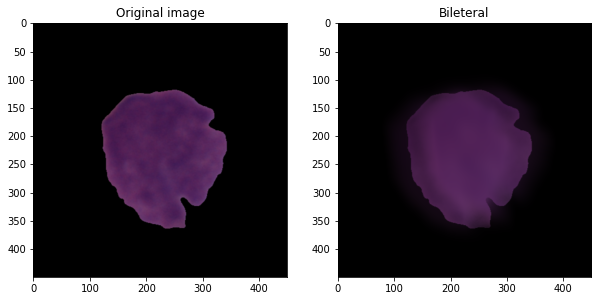

In [ ]:
# histo_equ_bilateral
# sharp_edge
# histo_equ_gamma
# gaussian
from skimage.metrics import peak_signal_noise_ratio

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import img_as_float

noisy_img = img_as_float(io.imread(sample_all))
print("Type of image: ", type(noisy_img))
sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=15,
                multichannel=True)


# Now we will plot original image, histogram equalized image and Biliteral image
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img_rgb)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(denoise_bilateral)
ax2.title.set_text("Bileteral")

plt.show()

In [ ]:
# sample image save
import numpy as np
s = (denoise_bilateral *255).astype(np.uint8)

io.imsave(dest_demo+ "bilateral.png", s)

In [ ]:
a = [1,2]
print(f"before clear: {a}")
# clear a list
a.clear()
print(f"after clear: {a}")

before clear: [1, 2]
after clear: []


In [ ]:
import numpy as np
# from skimage.metrics import peak_signal_noise_ratio

# from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
#                                  denoise_wavelet, estimate_sigma)
# from skimage import img_as_float
from imgaug import augmenters as iaa

# performing bilateral filter
seq = iaa.Sequential([
     iaa.BilateralBlur(
    d=(5, 10), sigma_color=(10, 250), sigma_space=(10, 250))
])

# taking a list to
imglist = []

# Saving All unsharp images into directory
dest_bilt_all = "/content/drive/MyDrive/Leukemia/bilateral_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # performing bilateral filtering
    # print(img_file)
    # noisy_img = img_as_float(io.imread(img_file))
    # sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

    # den_bilt = denoise_bilateral(noisy_img, sigma_spatial=15,
    #             multichannel=True)
    # den_bilt_1 = (den_bilt *255).astype(np.uint8)
    # plt.imshow(den_bilt_1)
    # plt.show()

    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imglist.append(img)
    images_aug = seq.augment_images(imglist)

    # saving unsharp image
    io.imsave(dest_bilt_all + 'all_bilateral_'+ str(k)+ '.png', images_aug[0])
    # print(f"{k} image done!")
    imglist.clear()

  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into bilateral filtered and saved..!")

Total 2500 ALL images converted into bilateral filtered and saved..!


In [ ]:
# Saving HEM bilateral images into directory
dest_bilt_hem = "/content/drive/MyDrive/Leukemia/bilateral_train/HEM/"

# keep track
k = 0

seq = iaa.Sequential([
     iaa.BilateralBlur(
    d=(5, 10), sigma_color=(10, 250), sigma_space=(10, 250))
])

imglist = []

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # print(img_file)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # noisy_img = img_as_float(io.imread(img_file))
    # sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

    # den_bilt = denoise_bilateral(noisy_img, sigma_spatial=15,
    #             multichannel=True)
    # den_bilt_1 = (den_bilt *255).astype(np.uint8)

    img = cv2.imread(img_file, 1)
    # converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imglist.append(img)
    images_aug = seq.augment_images(imglist)

    # saving bilateral image
    io.imsave(dest_bilt_hem + 'hem_bilateral_'+ str(k)+ '.png', images_aug[0])
    # print(k, " saved..!")
    imglist.clear()
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into bilateral filtered and saved..!")

Total 2500 HEM images converted into bilateral filtered and saved..!


In [ ]:
# Bilateral with different approach
import imgaug.augmenters as iaa

In [ ]:
aug = iaa.BilateralBlur(
    d=(3, 10), sigma_color=(10, 250), sigma_space=(10, 250))

In [ ]:
aug

BilateralBlur(name=UnnamedBilateralBlur, parameters=[DiscreteUniform(Deterministic(int 3), Deterministic(int 10)), Uniform(Deterministic(int 10), Deterministic(int 250)), Uniform(Deterministic(int 10), Deterministic(int 250))], deterministic=False)

In [ ]:
from imgaug import augmenters as iaa

import cv2

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)),
    iaa.Fliplr(0.5),
    iaa.GaussianBlur(sigma=(0, 3.0))
])

imglist = []

imglist.append(img_rgb)

images_aug = seq.augment_images(imglist)

# cv2.imwrite('new.jpg', images_aug[0])


In [ ]:
len(images_aug)

1

In [ ]:
images_aug[0].shape

(450, 450, 3)

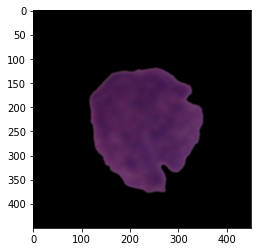

In [ ]:
plt.imshow(images_aug[0])

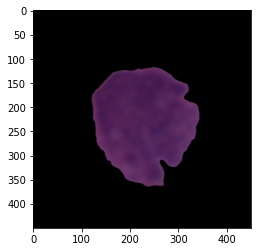

In [ ]:
# try this for applying bilateral filter and investigate execution time
from imgaug import augmenters as iaa

seq = iaa.Sequential([
     iaa.BilateralBlur(
    d=(5, 10), sigma_color=(10, 250), sigma_space=(10, 250))
])

imglist = []

imglist.append(img_rgb)

images_aug = seq.augment_images(imglist)

plt.imshow(images_aug[0])
plt.show()

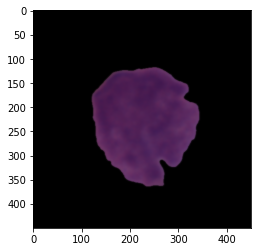

In [ ]:
plt.imshow(images_aug[0])
plt.show()

In [ ]:
# save image
io.imsave("/content/drive/MyDrive/Leukemia/image_aug_version.png", images_aug[0])

**NLM->Non local means**

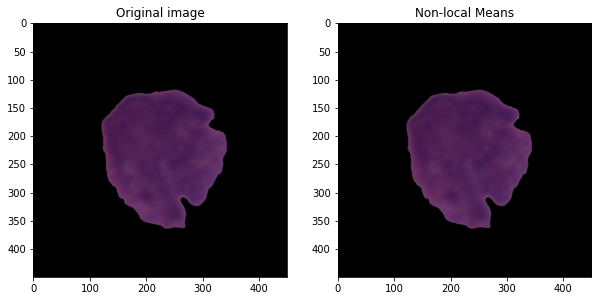

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
import numpy as np

img = img_as_float(io.imread(sample_all))

sigma_est = np.mean(estimate_sigma(img, multichannel=True))

patch_kw = dict(patch_size=5,
                patch_distance=3,
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
# ax2.imshow(denoise_img_as_8byte)
ax2.imshow(denoise_img)
ax2.title.set_text("Non-local Means")

plt.show()

In [ ]:
# Saving All unsharp images into directory
dest_nlm_all = "/content/drive/MyDrive/Leukemia/nlm_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):

    img = img_as_float(io.imread(img_file))

    sigma_est = np.mean(estimate_sigma(img, multichannel=True))

    patch_kw = dict(patch_size=5,
                    patch_distance=3,
                    multichannel=True)

    denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                                  patch_size=5, patch_distance=3, multichannel=True)
    """
    denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                              **patch_kw)
    """
    denoise_img_as_8byte = img_as_ubyte(denoise_img)

    # saving unsharp image
    io.imsave(dest_nlm_all + 'all_nlm_'+ str(k)+ '.png', denoise_img_as_8byte)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images converted into bilateral filtered and saved..!")

Total 2500 ALL images converted into bilateral filtered and saved..!


In [ ]:
# Saving All unsharp images into directory
dest_nlm_hem = "/content/drive/MyDrive/Leukemia/nlm_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):

    img = img_as_float(io.imread(img_file))

    sigma_est = np.mean(estimate_sigma(img, multichannel=True))

    patch_kw = dict(patch_size=5,
                    patch_distance=3,
                    multichannel=True)

    denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                                  patch_size=5, patch_distance=3, multichannel=True)
    """
    denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                              **patch_kw)
    """
    denoise_img_as_8byte = img_as_ubyte(denoise_img)

    # saving unsharp image
    io.imsave(dest_nlm_hem + 'hem_nlm_'+ str(k)+ '.png', denoise_img_as_8byte)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images converted into bilateral filtered and saved..!")

Total 2500 HEM images converted into bilateral filtered and saved..!


**Cany Edge Detection**

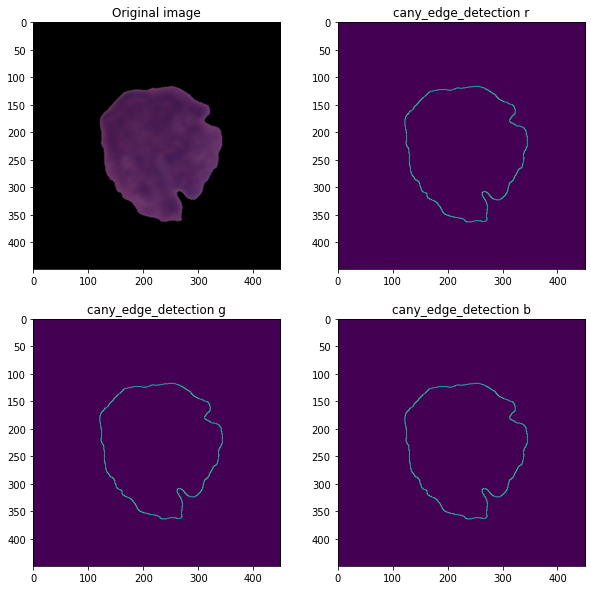

In [ ]:
img_r = cv2.imread(sample_all, 1)
# print(img_r.shape)
img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g,b = cv2.split(img_r)

edges_r = cv2.Canny(r,100,200)   #Image, min and max values
edges_g = cv2.Canny(g,100,200)
edges_b = cv2.Canny(b,100,200)

fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(2, 2, 1)
ax1.imshow(img_rgb)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(2,2,2)
ax2.imshow(edges_r)
ax2.title.set_text("cany_edge_detection r")

ax2= fig.add_subplot(2,2,3)
ax2.imshow(edges_r)
ax2.title.set_text("cany_edge_detection g")

ax2= fig.add_subplot(2,2,4)
ax2.imshow(edges_r)
ax2.title.set_text("cany_edge_detection b")

plt.show()
# it can be applied into a gray-scale image

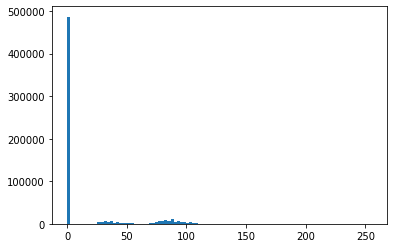

In [ ]:
plt.hist(img_rgb.flat, bins=100, range=(0, 255))
plt.show()

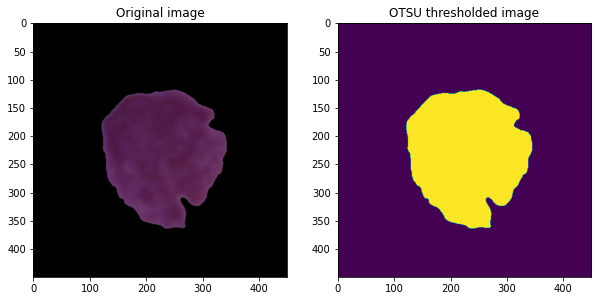

In [ ]:
# otsu thresholding
img_k = cv2.imread(sample_all, 1)
ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)   # 3x3 kernel with all ones.
erosion = cv2.erode(th,kernel,iterations = 1)  #Erodes pixels based on the kernel defined
#dialation
dilation = cv2.dilate(erosion,kernel,iterations = 1)  #Apply dilation after erosion to see the effect.

#Erosion followed by dilation can be a single operation called opening
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)  # Compare this image with the previous one

fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img_k)
ax1.title.set_text("Original image")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(opening)
ax2.title.set_text("OTSU thresholded image")

plt.show()
# hobe nah

**Shading correction using rolling ball background subtraction**

In [ ]:
import cv2

In [ ]:
!pip install opencv-rolling-ball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for opencv-rolling-ball: filename=opencv_rolling_ball-1.0.1-py3-none-any.whl size=6895 sha256=fc7a5d27808ae69751081e1c59b98a451463d31fbcea061174a0aef42e7014c9
  Stored in directory: /root/.cache/pip/wheels/30/6e/46/2176c00920c9cdde3e4c2ee98d657f3c7e596318bf0564b979
Successfully built opencv-rolling-ball


In [ ]:
from cv2_rolling_ball import subtract_background_rolling_ball

In [ ]:
# https://www.youtube.com/watch?v=hy5PlXX-CU0&list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW&index=45

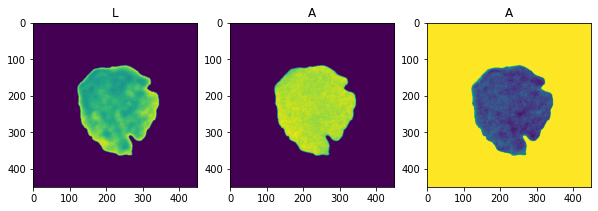

In [ ]:
img_3 = cv2.imread(sample_all, 1)
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(img_3, cv2.COLOR_RGB2LAB)

# splitting LAB image into l,a, b channel
l,a,b = cv2.split(lab_img)

# plotting image features and background separately using substract background rolling ball
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 3, 1)
ax1.imshow(l)
ax1.title.set_text("L")

ax2= fig.add_subplot(1,3,2)
ax2.imshow(a)
ax2.title.set_text("A")

ax2= fig.add_subplot(1,3,3)
ax2.imshow(b)
ax2.title.set_text("A")
plt.show()

L Channel Shape:  (450, 450)


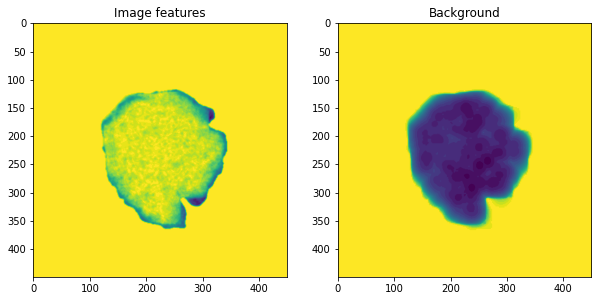

In [ ]:
# applying background subtraction on lab channel
radius=30
# final_img, background = subtract_background_rolling_ball(l, radius, light_background=True,
#                                      use_paraboloid=False, do_presmooth=True)

final_img, background = subtract_background_rolling_ball(b, radius, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

print("L Channel Shape: ", final_img.shape)

# Visualizing after background substraction
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(final_img)
ax1.title.set_text("Image features")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(background)
ax2.title.set_text("Background")
plt.show()

Text(0.5, 1.0, 'L channel after applying CLAHE')

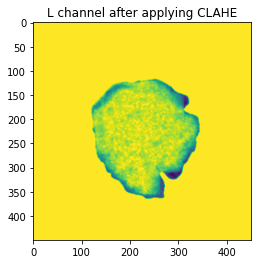

In [ ]:
# # applying clahe to L channel
# clahe = cv2.createCLAHE(clipLimit= 2.0, tileGridSize=(4,4))
# clahe_img = clahe.apply(l)
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img = clahe.apply(final_img)

plt.imshow(clahe_img)
plt.title("L channel after applying CLAHE")

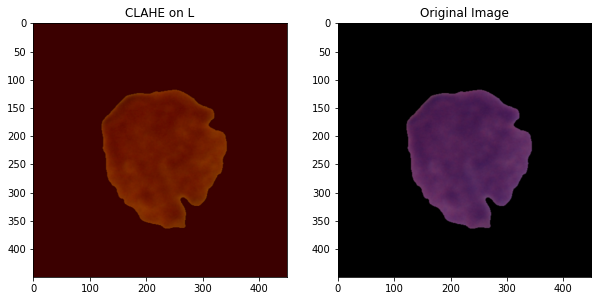

In [ ]:
# now combining clahe L, A and B
# f_clahe_img = cv2.merge((clahe_img, a, b))
f_clahe_img = cv2.merge((l, a, clahe_img))
clahe_m = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

# Visualizing after substracting background rolling ball on the L chanels
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(clahe_m)
ax1.title.set_text("CLAHE on L")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(img_3)
ax2.title.set_text("Original Image")
plt.show()

In [ ]:
clahe_m.shape

(450, 450, 3)

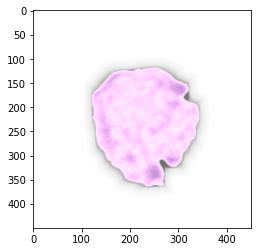

In [ ]:
plt.imshow(clahe_m, cmap='afmhot')
plt.show()

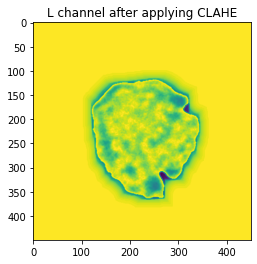

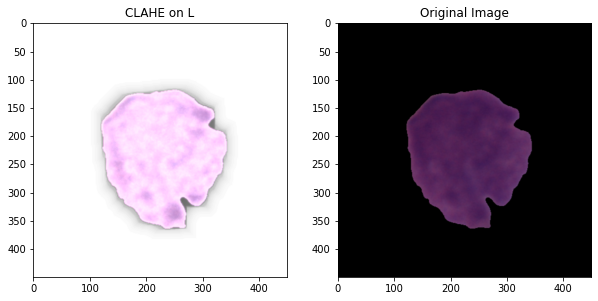

In [ ]:
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img = clahe.apply(final_img)

plt.imshow(clahe_img)
plt.title("L channel after applying CLAHE")
plt.show()

# now combining clahe L, A and B
f_clahe_img = cv2.merge((clahe_img, a, b))
clahe_m = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

# Visualizing after substracting background rolling ball on the L chanels
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(clahe_m)
ax1.title.set_text("CLAHE on L")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(img_3)
ax2.title.set_text("Original Image")
plt.show()

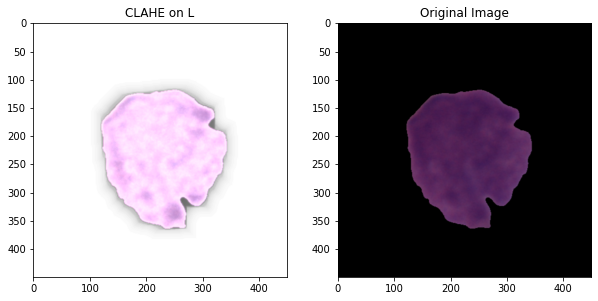

In [ ]:
# puttting all together
from cv2_rolling_ball import subtract_background_rolling_ball

# read image
img_3 = cv2.imread(sample_all, 1)
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

# converting to image to LAB color space so CLAHE can be applied to luminance
lab_img = cv2.cvtColor(img_3, cv2.COLOR_RGB2LAB)

# splitting LAB image into l,a, b channel
l,a,b = cv2.split(lab_img)

# applying background subtraction on lab channel
radius=30
final_img, background = subtract_background_rolling_ball(l, radius, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

# applying CLAHE on L chanels features
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img = clahe.apply(final_img)

# now combining clahe L, A and B
f_clahe_img = cv2.merge((clahe_img, a, b))
clahe_m = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

# Visualizing after substracting background rolling ball on the L chanels
fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(clahe_m)
ax1.title.set_text("CLAHE on L")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(img_3)
ax2.title.set_text("Original Image")
plt.show()

In [ ]:
# Saving All BGS images into directory
dest_bgs_all = "/content/drive/MyDrive/Leukemia/bg_subtract/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # read image
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # converting to image to LAB color space so CLAHE can be applied to luminance
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    # splitting LAB image into l,a, b channel
    l,a,b = cv2.split(lab_img)

    # applying background subtraction on lab channel
    radius=30
    final_img, background = subtract_background_rolling_ball(l, radius, light_background=True,
                                        use_paraboloid=False, do_presmooth=True)

    # applying CLAHE on L chanels features
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
    clahe_img = clahe.apply(final_img)

    # now combining clahe L, A and B
    f_clahe_img = cv2.merge((clahe_img, a, b))
    clahe_m = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

    # Visualizing after substracting background rolling ball on the L chanels
    # fig = plt.figure(figsize=(10,10))
    # ax1= fig.add_subplot(1, 2, 1)
    # ax1.imshow(clahe_m)
    # ax1.title.set_text("CLAHE on L")

    # ax2= fig.add_subplot(1,2,2)
    # ax2.imshow(img)
    # ax2.title.set_text("Original Image")
    # plt.show()

    # saving unsharp image
    io.imsave(dest_bgs_all + 'all_bgs_'+ str(k)+ '.png', clahe_m)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images are applied for background subtract and saved..!")

In [ ]:
print("..")

..


In [ ]:
# Saving HEM BGS images into directory
dest_bgs_hem = "/content/drive/MyDrive/Leukemia/bg_subtract/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 3:
  #   break
  if img_file.endswith('.bmp'):
    # read image
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # converting to image to LAB color space so CLAHE can be applied to luminance
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    # splitting LAB image into l,a, b channel
    l,a,b = cv2.split(lab_img)

    # applying background subtraction on lab channel
    radius=30
    final_img, background = subtract_background_rolling_ball(l, radius, light_background=True,
                                        use_paraboloid=False, do_presmooth=True)

    # applying CLAHE on L chanels features
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
    clahe_img = clahe.apply(final_img)

    # now combining clahe L, A and B
    f_clahe_img = cv2.merge((clahe_img, a, b))
    clahe_m = cv2.cvtColor(f_clahe_img, cv2.COLOR_LAB2RGB)

    # saving unsharp image
    io.imsave(dest_bgs_hem + 'hem_bgs_'+ str(k)+ '.png', clahe_m)
    print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Background subtract applied on total {str(k)} HEM images and saved..!")

**Cropping Image**

Original image shape: (450, 450, 3)
Cropped image shape: (310, 310, 3)


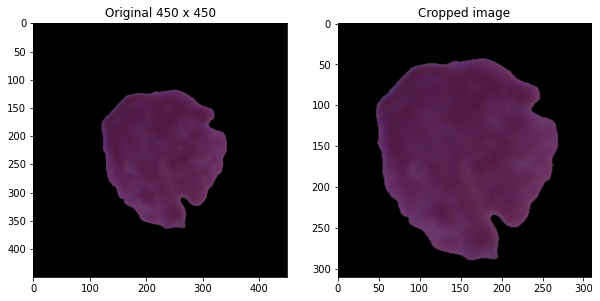

In [ ]:
# Importing Image class from PIL module
from PIL import Image
from matplotlib import cm

# Size of the image in pixels (size of original image)
# (This is not mandatory)
# width, height = clahe_img.shape[0], clahe_img.shape[1]
width, height = img.shape[0], img.shape[1]

# im = Image.fromarray(np.uint8(cm.gist_earth(clahe_img)*255))

# # Setting the points for cropped image
# left = 50
# top = height / 4
# right = 50
# bottom = 3 * height / 4

# # Cropped image of above dimension
# # (It will not change original image)
# cropped_img = im.crop((left, top, right, bottom))
# s= np.array(cropped_img)
# print("Clahe image shape: ", clahe_m.shape)
# cropped_image = clahe_m[100:375, 100:375]
print(f"Original image shape: {img.shape}")
cropped_img = img[75:385, 75:385]
print(f"Cropped image shape: {cropped_img.shape}")

fig = plt.figure(figsize=(10,10))
ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax1.title.set_text("Original 450 x 450")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(cropped_img)
ax2.title.set_text("Cropped image")
plt.show()

# print(f"cropped image shape: {cropped_image.shape}")
# plt.imshow(cropped_image)
# plt.imshow(img)
# plt.show()

In [ ]:
# image[rows,columns]
# where
# rows are the row slice
# columns is the column slice

In [ ]:
# saving 310 x 310 cropped images into directory
# Saving All BGS images into directory
dest_crp_all = "/content/drive/MyDrive/Leukemia/cropped_train/ALL/"

# keep track
k = 0

for images in os.listdir(all_src):
  img_file = all_src + str(images)
  # if k == 20:
  #   break
  if img_file.endswith('.bmp'):
    # read image
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # cropping image
    cropped_img = img[75:385, 75:385]
    # print(f"shape of cropped image: {cropped_img.shape}")

    # Visualizing after substracting background rolling ball on the L chanels
    # fig = plt.figure(figsize=(10,10))
    # ax1= fig.add_subplot(1, 2, 1)
    # ax1.imshow(img)
    # ax1.title.set_text("Original Image ")

    # ax2= fig.add_subplot(1,2,2)
    # ax2.imshow(cropped_img)
    # ax2.title.set_text("Cropped Image")
    # plt.show()

    # saving unsharp image
    io.imsave(dest_crp_all + 'all_cropped_'+ str(k)+ '.png', cropped_img)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images are cropped and saved..!")

Total 2500 ALL images are cropped and saved..!


In [ ]:
# saving 310 x 310 cropped images into directory
dest_crp_hem = "/content/drive/MyDrive/Leukemia/cropped_train/HEM/"

# keep track
k = 0

for images in os.listdir(hem_src):
  img_file = hem_src + str(images)
  # if k == 20:
  #   break
  if img_file.endswith('.bmp'):
    # read image
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # cropping image
    cropped_img = img[75:385, 75:385]

    # saving unsharp image
    io.imsave(dest_crp_hem + 'hem_cropped_'+ str(k)+ '.png', cropped_img)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images are cropped and saved..!")

Total 2500 HEM images are cropped and saved..!


In [ ]:
test_all_src = "/content/drive/MyDrive/Leukemia/test_set/ALL/"
test_hem_src = "/content/drive/MyDrive/Leukemia/test_set/HEM/"

test_all_dest = "/content/drive/MyDrive/Leukemia/cropped_test/ALL/"
test_hem_dest = "/content/drive/MyDrive/Leukemia/cropped_test/HEM/"

In [ ]:
# keep track
k = 0

for images in os.listdir(test_all_src):
  img_file = test_all_src + str(images)
  # if k == 20:
  #   break
  if img_file.endswith('.bmp'):
    # read image
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # cropping image
    cropped_img = img[75:385, 75:385]

    # saving unsharp image
    io.imsave(test_all_dest + 'all_cropped_'+ str(k)+ '.png', cropped_img)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} ALL images are cropped and saved..!")

Total 1219 ALL images are cropped and saved..!


In [ ]:
# keep track
k = 0

for images in os.listdir(test_hem_src):
  img_file = test_hem_src + str(images)
  # if k == 20:
  #   break
  if img_file.endswith('.bmp'):
    # read image
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # cropping image
    cropped_img = img[75:385, 75:385]

    # saving unsharp image
    io.imsave(test_hem_dest + 'hem_cropped_'+ str(k)+ '.png', cropped_img)
    # print(f"{k} image done!")
  else:
    pass
  k += 1

print(f"Total {str(k)} HEM images are cropped and saved..!")

Total 648 HEM images are cropped and saved..!


In [ ]:
from cv2_rolling_ball import subtract_background_rolling_ball

img = cv2.imread(sample_all, 0)
img, background = subtract_background_rolling_ball(img, 30, light_background=True,
                                     use_paraboloid=False, do_presmooth=True)

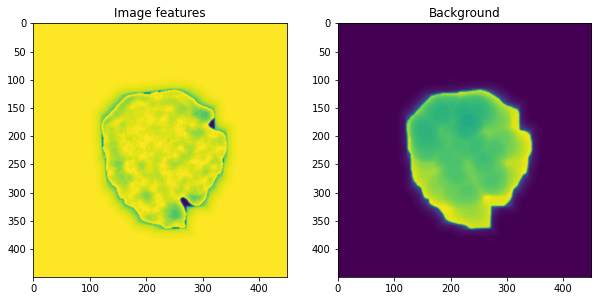

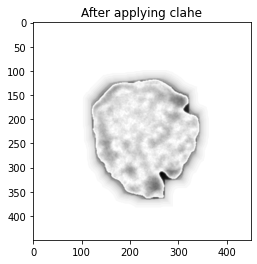

In [ ]:
# plotting image features and background separately using substract background rolling ball
fig = plt.figure(figsize=(10,10))

ax1= fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax1.title.set_text("Image features")

ax2= fig.add_subplot(1,2,2)
ax2.imshow(background)
ax2.title.set_text("Background")

plt.show()

#optionally perform CLAHE to equalize histogram for better segmentation
#otherwise the image may appear washedout.

clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

plt.imshow(clahe_img, cmap='gray')
plt.title("After applying clahe")
plt.show()

In [ ]:
print(f"Shape of Image features: {img.shape}, and shape of background: {background.shape}")

Shape of Image features: (450, 450), and shape of background: (450, 450)
